In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

#!pip install imblearn
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Sampling

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1rLoJ3KHZH68zkef-uIo97eAhxSDPMl-R?usp=sharing)

## Plotting Functions

In [2]:
# Function to plot class distribution
def plot_class_distribution(y, title):
    counter = Counter(y)
    plt.bar(counter.keys(), counter.values())
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.show()

# Function to resample data and plot distribution
def resample_and_plot(X, y, sampler, title):
    X_res, y_res = sampler.fit_resample(X, y)
    plot_class_distribution(y_res, title)
    return X_res, y_res

In [3]:
# Load original digits dataset
digits = load_digits()
X, y = digits.data, digits.target

## Data and Class Distribution

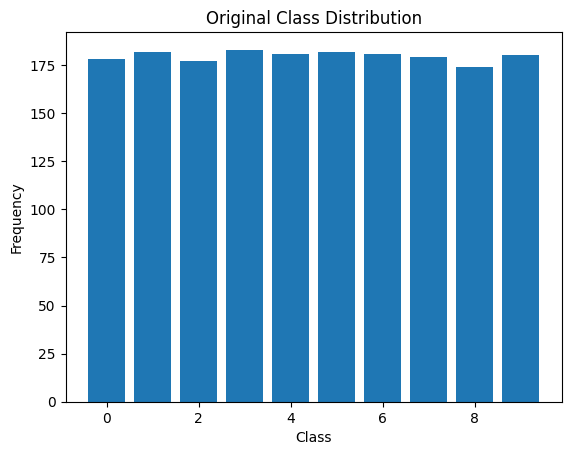

In [4]:
# Original class distribution
plot_class_distribution(y, 'Original Class Distribution')

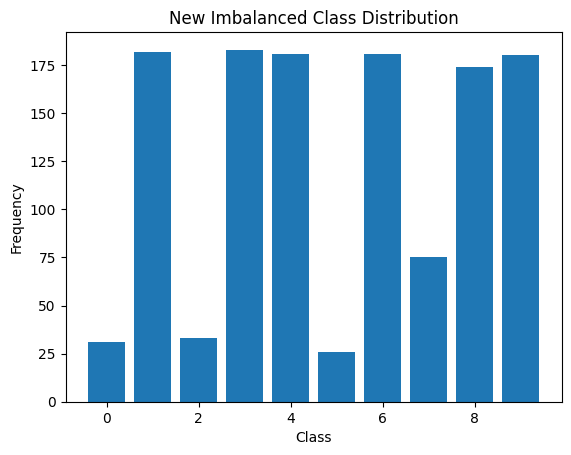

In [5]:
# Classes to be reduced
classes_to_reduce = [0, 2, 5, 7]

# Create imbalanced dataset by reducing specified classes
indices_to_keep = [i for i, label in enumerate(y) if label not in classes_to_reduce]

# Reduce 90% of the instances of specified classes
for class_label in classes_to_reduce:
    indices_class = np.where(y == class_label)[0]
    percent_class_to_drop = random.uniform(0, 1)
    reduced_indices_class = np.random.choice(indices_class, size=int(len(indices_class) * percent_class_to_drop), replace=False)
    indices_to_keep.extend(reduced_indices_class)
X_imbalanced = X[indices_to_keep]
y_imbalanced = y[indices_to_keep]

# Plot new class distribution
plot_class_distribution(y_imbalanced, 'New Imbalanced Class Distribution')

In [6]:
X = X[indices_to_keep]
y = y[indices_to_keep]

## Undersampling

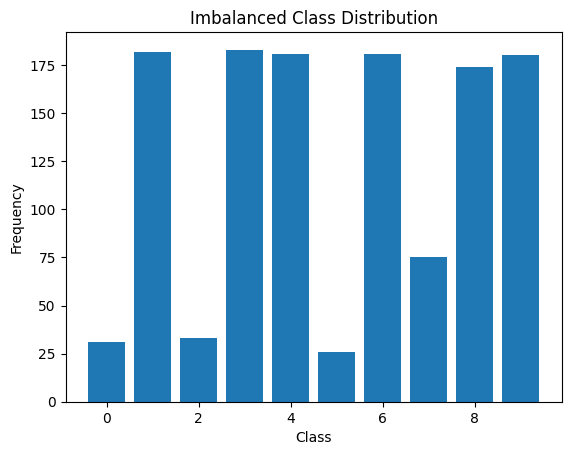

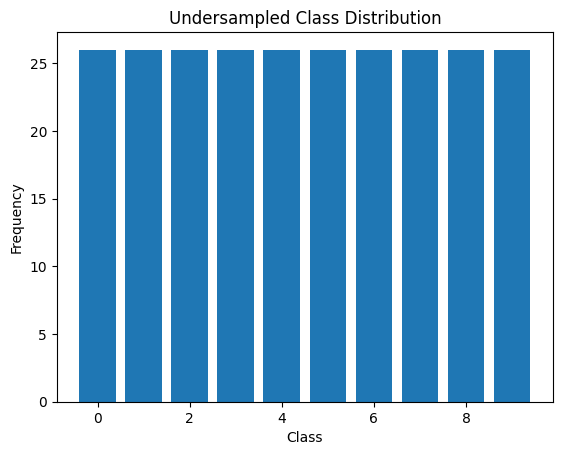

In [7]:
# Undersampling majority class
rus = RandomUnderSampler(random_state=3001)
plot_class_distribution(y_imbalanced, 'Imbalanced Class Distribution')
X_rus, y_rus = resample_and_plot(X, y, rus, 'Undersampled Class Distribution')

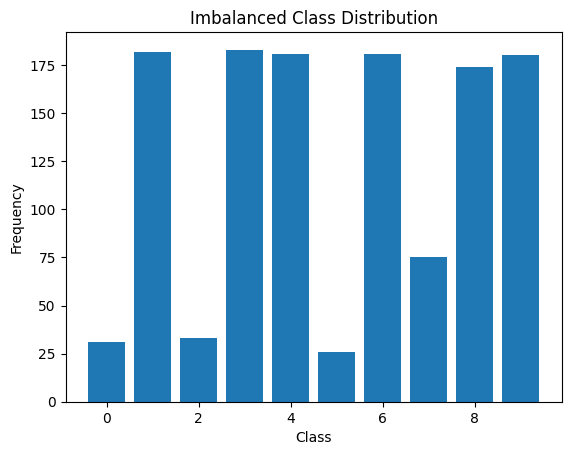

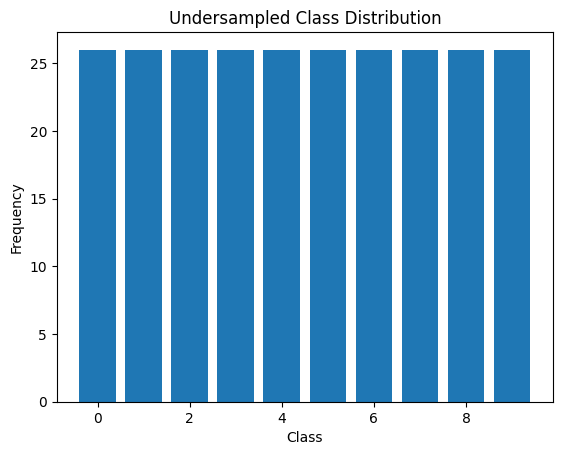

In [8]:
# Undersampling majority class
rus = RandomUnderSampler(sampling_strategy='not minority', random_state=3001)
plot_class_distribution(y_imbalanced, 'Imbalanced Class Distribution')
X_rus, y_rus = resample_and_plot(X, y, rus, 'Undersampled Class Distribution')

## Oversampling

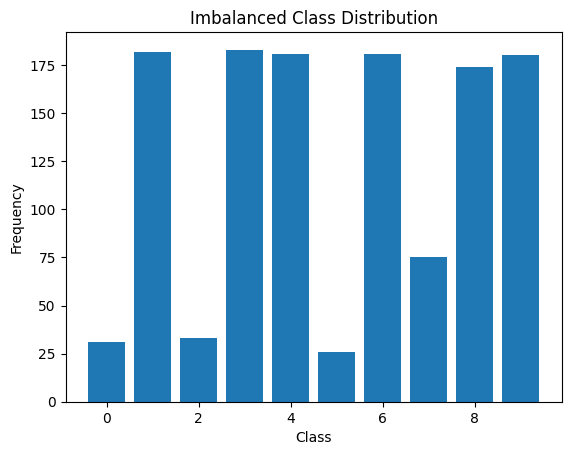

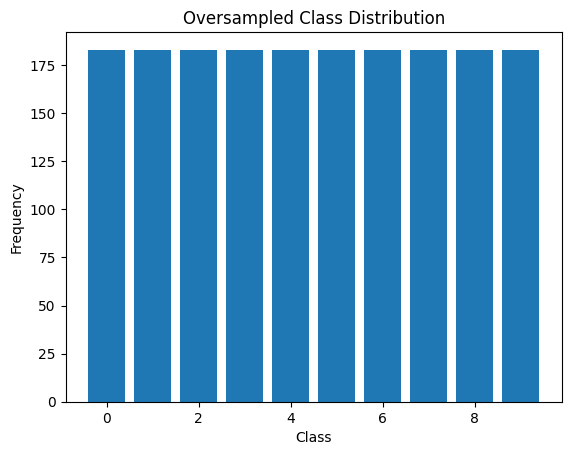

In [9]:
# Oversampling minority class
ros = RandomOverSampler(random_state=3001)
plot_class_distribution(y_imbalanced, 'Imbalanced Class Distribution')
X_ros, y_ros = resample_and_plot(X, y, ros, 'Oversampled Class Distribution')

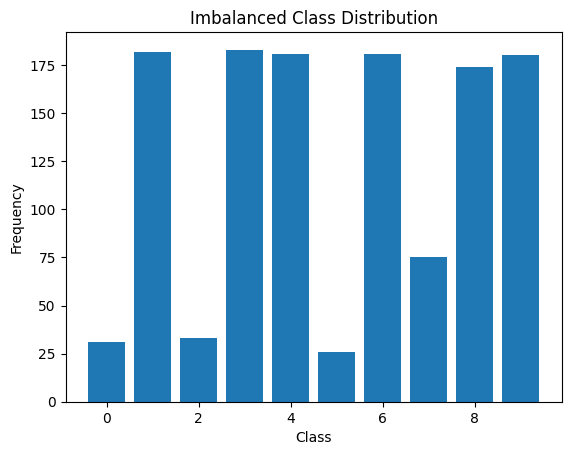

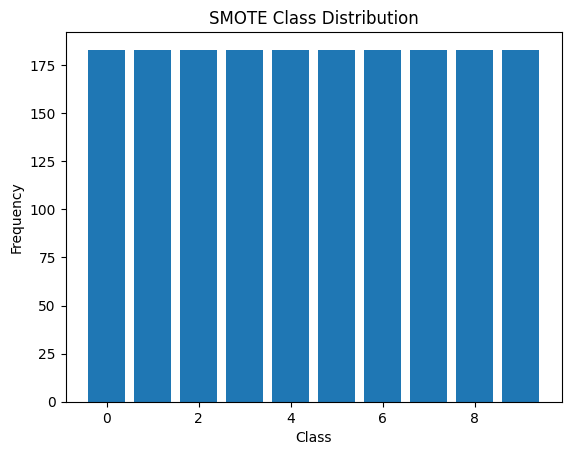

In [10]:
# SMOTE
smote = SMOTE(random_state=3001)
plot_class_distribution(y_imbalanced, 'Imbalanced Class Distribution')
X_smote, y_smote = resample_and_plot(X, y, smote, 'SMOTE Class Distribution')

# Cross-Validation

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
import warnings

In [12]:
# Load the dataset with selected categories for binary classification
categories = ['alt.atheism', 'talk.religion.misc']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=3001)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=3001)

In [13]:
# Text data and labels
X_train_texts = newsgroups_train.data
y_train = newsgroups_train.target
X_test_texts = newsgroups_test.data
y_test = newsgroups_test.target

In [14]:
X_test_texts[0]

"From: danb@shell.portal.com (Dan E Babcock)\nSubject: Re: Faith and Dogma\nNntp-Posting-Host: jobe\nOrganization: Portal Communications Company -- 408/973-9111 (voice) 408/973-8091 (data)\nLines: 47\n\nIn article <1r1mr8$eov@aurora.engr.LaTech.edu> ray@engr.LaTech.edu (Bill Ray) writes:\n>Todd Kelley (tgk@cs.toronto.edu) wrote:\n>: Faith and dogma are dangerous.  \n>\n>Faith and dogma are inevitable.  Christians merely understand and admit\n>to the fact.  Give me your proof that no God exists, or that He does.  \n>Whichever position you take, you are forced to do it on faith.  It does\n>no good to say you take no position, for to show no interest in the \n>existence of God is to assume He does not exist.\n\nAbsolutely not true. Without religion - either an established one or\none you invent for yourself - the theist and atheist are equally\n(not) interested in God, because without religious revelation there\nis _no_ information about God available. Strip away the dogma and\nthe theist

In [15]:
y_test[0]

0

In [16]:
# TF-IDF Vectorization to encode text data
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train_texts)
X_test = vectorizer.transform(X_test_texts)

In [17]:
X_test

<570x17791 sparse matrix of type '<class 'numpy.float64'>'
	with 64386 stored elements in Compressed Sparse Row format>

In [18]:
model = MultinomialNB()

In [19]:
# Define 5-fold Stratified Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [20]:
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

In [21]:
cv_scores

array([0.85465116, 0.88372093, 0.84795322, 0.92982456, 0.90643275])

In [22]:
# Fit the model on the train set
model.fit(X_train, y_train)

MultinomialNB()

In [23]:
# Test on the test set for comparison
test_score = model.score(X_test, y_test)

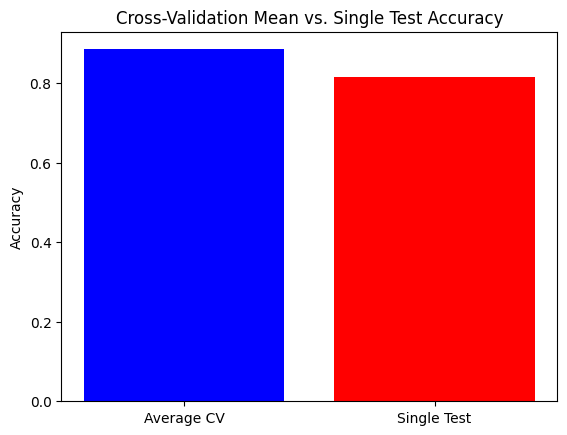

In [24]:
# Plotting CV and single test score for comparison
plt.bar(['Average CV', 'Single Test'], [np.mean(cv_scores), test_score], color=['blue', 'red'])
plt.ylabel('Accuracy')
plt.title('Cross-Validation Mean vs. Single Test Accuracy')
plt.show()

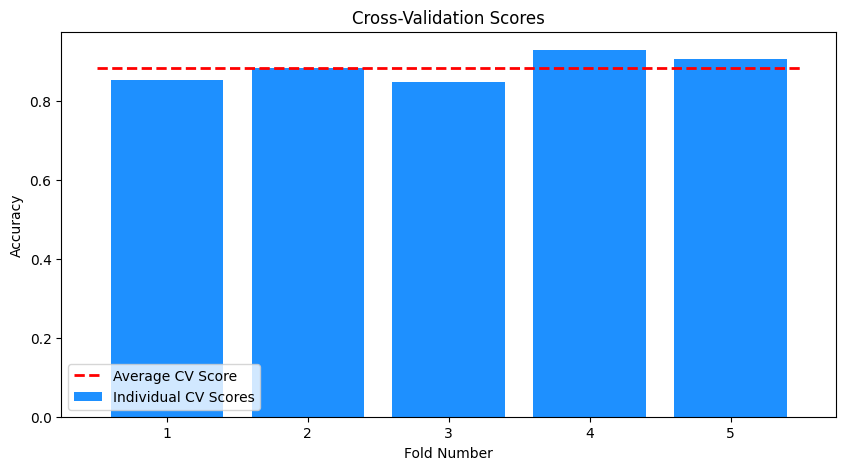

In [25]:
plt.figure(figsize=(10, 5))
x_range = np.arange(1, len(cv_scores) + 1)
plt.bar(x_range, cv_scores, color='dodgerblue', label='Individual CV Scores')
plt.plot([0.5, len(cv_scores) + 0.5], [np.mean(cv_scores)]*2, 'r--', label='Average CV Score', linewidth=2)
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.xticks(x_range)
plt.legend()
plt.show()

## Picking Optimal Number of Folds

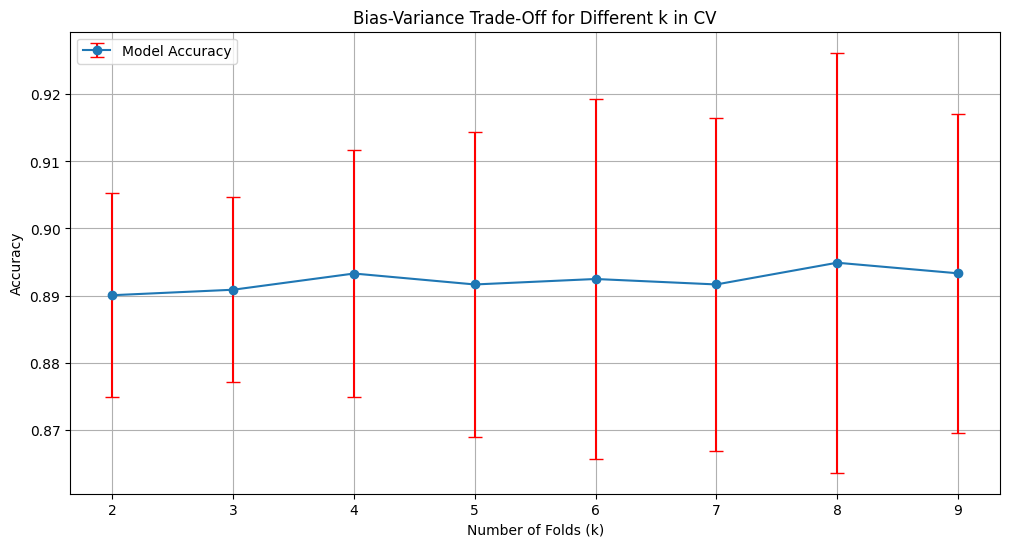

In [27]:
# Evaluate model with varying k for cross-validation
k_values = range(2, 10)  # From 2 to 10 folds
mean_scores = []
std_scores = []

warnings.simplefilter("ignore") #Tell model to stop complaining :)
for k in k_values:
      cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
      scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
      mean_scores.append(np.mean(scores))
      std_scores.append(np.std(scores))

# Plotting the bias and variance
plt.figure(figsize=(12, 6))
plt.errorbar(k_values, mean_scores, yerr=std_scores, fmt='o-', label='Model Accuracy', ecolor='red', capsize=5)
plt.title('Bias-Variance Trade-Off for Different k in CV')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

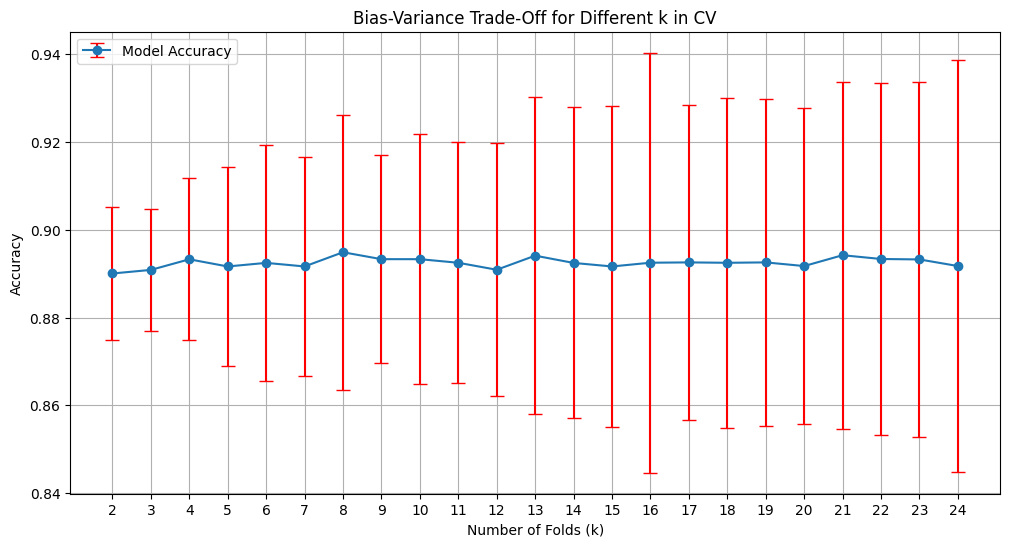

In [29]:
# Evaluate model with varying k for cross-validation
k_values = range(2, 25)  # From 2 to 25 folds
mean_scores = []
std_scores = []

warnings.simplefilter("ignore") #Tell model to stop complaining :)
for k in k_values:
      cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
      scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
      mean_scores.append(np.mean(scores))
      std_scores.append(np.std(scores))

# Plotting the bias and variance
plt.figure(figsize=(12, 6))
plt.errorbar(k_values, mean_scores, yerr=std_scores, fmt='o-', label='Model Accuracy', ecolor='red', capsize=5)
plt.title('Bias-Variance Trade-Off for Different k in CV')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Evaluate model with varying k for cross-validation
k_values = range(2, 50)  # From 2 to 50 folds
mean_scores = []
std_scores = []

warnings.simplefilter("ignore") #Tell model to stop complaining :)
for k in k_values:
      cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
      scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
      mean_scores.append(np.mean(scores))
      std_scores.append(np.std(scores))

# Plotting the bias and variance
plt.figure(figsize=(12, 6))
plt.errorbar(k_values, mean_scores, yerr=std_scores, fmt='o-', label='Model Accuracy', ecolor='red', capsize=5)
plt.title('Bias-Variance Trade-Off for Different k in CV (YOLO Version)')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()